## Files and Paths

## Backslash on Windows and Forward Slash on macOS and Linux

On Windows, paths are written using backslashes (\) as the separator between folder names. The macOS and Linux operating systems, however, use the forward slash (/) as their path separator. If you want your programs to work on all operating systems, you will have to write your Python scripts to handle both cases.

Fortunately, this is simple to do with the `Path()` function in the `pathlib` module. If you pass it the string values of individual file and folder names in your path, `Path()` will return a string with a file path using the correct path separators. 

In [9]:
from pathlib import Path
Path('spam', 'bacon', 'eggs')

WindowsPath('spam/bacon/eggs')

In [2]:
str(Path('spam', 'bacon', 'eggs'))

'spam\\bacon\\eggs'

## Using the / Operator to Join Paths

We normally use the `+` operator to add two integer or floating-point numbers, such as in the expression `2 + 2`, which evaluates to the integer value `4`. But we can also use the `+` operator to concatenate two string values, like the expression `'Hello' + 'World'`, which evaluates to the string value `'HelloWorld'`. Similarly, the `/` operator that we normally use for division can also combine Path objects and strings. This is helpful for modifying a Path object after you’ve already created it with the `Path()` function.

In [3]:
Path('spam') / 'bacon' / 'eggs'

WindowsPath('spam/bacon/eggs')

In [4]:
Path('spam') / Path('bacon/eggs')

WindowsPath('spam/bacon/eggs')

In [5]:
Path('spam') / Path('bacon', 'eggs')

WindowsPath('spam/bacon/eggs')

In [8]:
homeFolder = r'C:\Users\Al'
subFolder = 'spam'
homeFolder + '\\' + subFolder
'\\'.join([homeFolder, subFolder])

'C:\\Users\\Al\\spam'

A script that uses this code isn’t safe, because its backslashes would only work on Windows. You could add an if statement that checks `sys.platform` (which contains a string describing the computer’s operating system) to decide what kind of slash to use, but applying this custom code everywhere it’s needed can be inconsistent and bug-prone.

The `pathlib` module solves these problems by reusing the / math division operator to join paths correctly, no matter what operating system your code is running on. 

The only thing you need to keep in mind when using the `/` operator for joining paths is that one of the first two values must be a Path object.

The `/` operator replaces the older `os.path.join()` function.

## The Current Working Directory

Every program that runs on your computer has a current working directory, or cwd. Any filenames or paths that do not begin with the root folder are assumed to be under the current working directory.
You can get the current working directory as a string value with the `Path.cwd()` function and change it using `os.chdir()`.

In [9]:
Path.cwd()

WindowsPath('C:/Users/tg715c/Documents/Python Scripts/automate-stuff')

There is no `pathlib` function for changing the working directory, because changing the current working directory while a program is running can often lead to subtle bugs.

The `os.getcwd()` function is the older way of getting the current working directory as a string.

## The Home Directory

ll users have a folder for their own files on the computer called the home directory or home folder. You can get a Path object of the home folder by calling `Path.home()`:

In [10]:
Path.home()

WindowsPath('C:/Users/tg715c')

## Absolute vs. Relative Paths

There are two ways to specify a file path:

1. An absolute path, which always begins with the root folder
2. A relative path, which is relative to the program’s current working directory

There are also the dot (`.`) and dot-dot (`..`) folders. These are not real folders but special names that can be used in a path. A single period (“dot”) for a folder name is shorthand for “this directory.” Two periods (“dot-dot”) means “the parent folder.”

The `.\` at the start of a relative path is optional. For example, `.\spam.txt` and `spam.txt` refer to the same file.

## Creating New Folders Using the `os.makedirs()` Function

In [18]:
import os
path = Path.cwd() / 'automate_online-materials' / 'CH 9 Test Folder' / 'Another Folder' / 'Yes Another Folder'

In [19]:
print(path)

C:\Users\tg715c\Documents\Python Scripts\automate-stuff\automate_online-materials\CH 9 Test Folder\Another Folder\Yes Another Folder


In [24]:
os.makedirs(path)

That is, `os.makedirs()` will create any necessary intermediate folders in order to ensure that the full path exists.

To make a directory from a Path object, call the `mkdir()` method. 

In [27]:
Path(path / 'spam').mkdir()

Note that `mkdir()` can only make one directory at a time; it won’t make several subdirectories at once like `os.makedirs()`.

## Handling Absolute and Relative Paths

The `pathlib` module provides methods for checking whether a given path is an absolute path and returning the absolute path of a relative path.
Calling the `is_absolute()` method on a Path object will return True if it represents an absolute path or False if it represents a relative path.

In [28]:
Path.cwd()

WindowsPath('C:/Users/tg715c/Documents/Python Scripts/automate-stuff')

In [29]:
Path.cwd().is_absolute()

True

In [30]:
Path('spam/bacon/eggs').is_absolute()

False

To get an absolute path from a relative path, you can put `Path.cwd() /` in front of the relative Path object. After all, when we say “relative path,” we almost always mean a path that is relative to the current working directory.

In [31]:
Path('my/relative/path')

WindowsPath('my/relative/path')

In [32]:
Path.cwd() / Path('my/relative/path')

WindowsPath('C:/Users/tg715c/Documents/Python Scripts/automate-stuff/my/relative/path')

If your relative path is relative to another path besides the current working directory, just replace `Path.cwd()` with that other path instead. 

In [33]:
Path('my/relative/path')

WindowsPath('my/relative/path')

In [34]:
Path.home() / Path('my/relative/path')

WindowsPath('C:/Users/tg715c/my/relative/path')

The `os.path` module also has some useful functions related to absolute and relative paths:

1. Calling `os.path.abspath(path)` will return a string of the absolute path of the argument. This is an easy way to convert a relative path into an absolute one.
2. Calling `os.path.isabs(path)` will return True if the argument is an absolute path and False if it is a relative path.
3. Calling `os.path.relpath(path, start)` will return a string of a relative path from the start path to path. If start is not provided, the current working directory is used as the start path.

In [35]:
os.path.abspath('.')

'C:\\Users\\tg715c\\Documents\\Python Scripts\\automate-stuff'

In [39]:
 os.path.abspath('.\\CH 9 Test Folder')

'C:\\Users\\tg715c\\Documents\\Python Scripts\\automate-stuff\\CH 9 Test Folder'

In [40]:
os.path.isabs('.')

False

In [41]:
os.path.isabs(os.path.abspath('.'))

True

In [42]:
os.path.relpath('C:\\Windows', 'C:\\')

'Windows'

In [43]:
os.path.relpath('C:\\Windows', 'C:\\spam\\eggs')

'..\\..\\Windows'

When the relative path is within the same parent folder as the path, but is within subfolders of a different path, such as `'C:\\Windows'` and `'C:\\spam\\eggs'`, you can use the “dot-dot” notation to return to the parent folder.

## Getting the Parts of a File Path

Given a `Path` object, you can extract the file path’s different parts as strings using several `Path `object attributes. These can be useful for constructing new file paths based on existing ones.

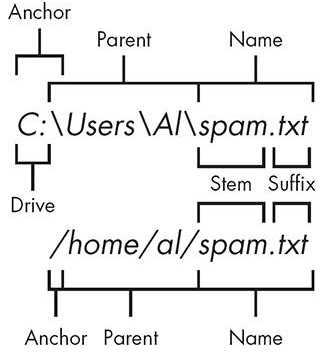

The parts of a file path include the following:

* The `anchor`, which is the root folder of the filesystem
* On Windows, the `drive`, which is the single letter that often denotes a physical hard drive or other storage device
* The `parent`, which is the folder that contains the file
* The `name` of the file, made up of the stem (or base name) and the suffix (or extension)

Note that Windows Path objects have a `drive` attribute, but macOS and Linux Path objects don’t. The `drive` attribute doesn’t include the first backslash.

In [44]:
p = Path('C:/Users/Al/spam.txt')

In [45]:
p.anchor

'C:\\'

In [46]:
p.parent 

WindowsPath('C:/Users/Al')

In [47]:
 p.name

'spam.txt'

In [48]:
p.stem

'spam'

In [49]:
p.suffix

'.txt'

In [50]:
p.drive

'C:'

These attributes evaluate to simple string values, except for `parent`, which evaluates to another `Path` object.
The `parents` attribute (which is different from the `parent` attribute) evaluates to the ancestor folders of a `Path` object with an integer index:

In [51]:
Path.cwd()

WindowsPath('C:/Users/tg715c/Documents/Python Scripts/automate-stuff')

In [52]:
Path.cwd().parents[0]

WindowsPath('C:/Users/tg715c/Documents/Python Scripts')

In [53]:
Path.cwd().parents[1]

WindowsPath('C:/Users/tg715c/Documents')

In [54]:
Path.cwd().parents[2]

WindowsPath('C:/Users/tg715c')

In [55]:
Path.cwd().parents[3]

WindowsPath('C:/Users')

In [56]:
Path.cwd().parents[4]

WindowsPath('C:/')

In [60]:
len(Path.cwd().parents)

5

In [62]:
Path.cwd().parents[len(Path.cwd().parents)-1]

WindowsPath('C:/')

The older `os.path` module also has similar functions for getting the different parts of a `path` written in a string value. Calling `os.path.dirname(path)` will return a string of everything that comes before the last slash in the path argument. Calling `os.path.basename(path)` will return a string of everything that comes after the last slash in the path argument. 

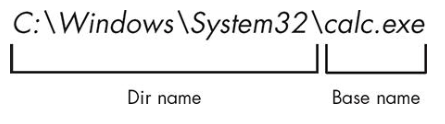

In [63]:
calcFilePath = 'C:\\Windows\\System32\\calc.exe'

In [64]:
os.path.basename(calcFilePath)

'calc.exe'

In [65]:
os.path.dirname(calcFilePath)

'C:\\Windows\\System32'

If you need a path’s dir name and base name together, you can just call `os.path.split()` to get a tuple value with these two strings.

In [66]:
os.path.split(calcFilePath)

('C:\\Windows\\System32', 'calc.exe')

Also, note that `os.path.split()` does not take a file path and return a list of strings of each folder. For that, use the `split()` string method and split on the string in `os.sep`. (Note that `sep` is in `os`, not `os.path`.) The `os.sep` variable is set to the correct folder-separating slash for the computer running the program, '\\' on Windows and '/' on macOS and Linux, and splitting on it will return a list of the individual folders.

In [67]:
calcFilePath.split(os.sep)

['C:', 'Windows', 'System32', 'calc.exe']

## Finding File Sizes and Folder Contents

Once you have ways of handling file paths, you can then start gathering information about specific files and folders. The `os.path` module provides functions for finding the size of a file in bytes and the files and folders inside a given folder.

* Calling `os.path.getsize(path)` will return the size in bytes of the file in the path argument.
* Calling `os.listdir(path)` will return a list of filename strings for each file in the path argument. (Note that this function is in the os module, not `os.path`.)

In [73]:
os.path.getsize('C:\\Windows\\System32\\calc.exe')

27648

In [1]:
# os.listdir('C:\\Windows\\System32')

If I want to find the total size of all the files in this directory, I can use `os.path.getsize()` and `os.listdir()` together.

In [70]:
totalSize = 0

In [71]:
for filename in os.listdir('C:\\Windows\\System32'):
      totalSize = totalSize + os.path.getsize(os.path.join('C:\\Windows\\System32', filename))

In [72]:
print(totalSize)

2317524560


## Modifying a List of Files Using Glob Patterns

If you want to work on specific files, the `glob()` method is simpler to use than `listdir()`. Path objects have a `glob()` method for listing the contents of a folder according to a glob pattern. Glob patterns are like a simplified form of regular expressions often used in command line commands. The `glob()` method returns a generator object (which are beyond the scope of this book) that you’ll need to pass to `list()` to easily view in the interactive shell:

In [77]:
p = Path().cwd()

In [78]:
p.glob('*')

<generator object Path.glob at 0x000002954CDBFBC0>

In [79]:
list(p.glob('*')) 

[WindowsPath('C:/Users/tg715c/Documents/Python Scripts/automate-stuff/.git'),
 WindowsPath('C:/Users/tg715c/Documents/Python Scripts/automate-stuff/.gitignore'),
 WindowsPath('C:/Users/tg715c/Documents/Python Scripts/automate-stuff/.idea'),
 WindowsPath('C:/Users/tg715c/Documents/Python Scripts/automate-stuff/.ipynb_checkpoints'),
 WindowsPath('C:/Users/tg715c/Documents/Python Scripts/automate-stuff/.vscode'),
 WindowsPath('C:/Users/tg715c/Documents/Python Scripts/automate-stuff/07-Pattern Matching with Regular Expressions.ipynb'),
 WindowsPath('C:/Users/tg715c/Documents/Python Scripts/automate-stuff/08-Input Validation.ipynb'),
 WindowsPath('C:/Users/tg715c/Documents/Python Scripts/automate-stuff/09-Reading and Writing Files.ipynb'),
 WindowsPath('C:/Users/tg715c/Documents/Python Scripts/automate-stuff/13-Working With Excel Spreadsheets.ipynb'),
 WindowsPath('C:/Users/tg715c/Documents/Python Scripts/automate-stuff/15-Working with PDF and Word Documents.ipynb'),
 WindowsPath('C:/Users/

he asterisk (`*`) stands for “multiple of any characters,” so `p.glob('*')` returns a generator of all files in the path stored in `p`.

Like with regexes, you can create complex expressions:

In [81]:
list(p.glob('*.txt'))

[WindowsPath('C:/Users/tg715c/Documents/Python Scripts/automate-stuff/requirements.txt')]

he glob pattern '*.txt' will return files that start with any combination of characters as long as it ends with the string '.txt', which is the text file extension.

In contrast with the asterisk, the question mark (?) stands for any single character:

In [84]:
list(p.glob('project?.docx'))

[]

The glob expression 'project?.docx' will return 'project1.docx' or 'project5.docx', but it will not return 'project10.docx', because ? only matches to one character—so it will not match to the two-character string '10'.

Finally, you can also combine the asterisk and question mark to create even more complex glob expressions, like this:

In [85]:
 list(p.glob('*.?x?'))

[WindowsPath('C:/Users/tg715c/Documents/Python Scripts/automate-stuff/requirements.txt')]

The glob expression '*.?x?' will return files with any name and any three-character extension where the middle character is an 'x'.

By picking out files with specific attributes, the `glob()` method lets you easily specify the files in a directory you want to perform some operation on. You can use a for loop to iterate over the generator that `glob()` returns:

In [86]:
for textFilePathObj in p.glob('*.txt'):
    print(textFilePathObj) # Prints the Path object as a string.

C:\Users\tg715c\Documents\Python Scripts\automate-stuff\requirements.txt


## Checking Path Validity

Many Python functions will crash with an error if you supply them with a path that does not exist. Luckily, `Path` objects have methods to check whether a given path exists and whether it is a file or folder. Assuming that a variable `p` holds a `Path `object, you could expect the following:

* Calling `p.exists()` returns True if the path exists or returns False if it doesn’t exist.
* Calling `p.is_file()` returns True if the path exists and is a file, or returns False otherwise.
* Calling `p.is_dir()` returns True if the path exists and is a directory, or returns False otherwise.

In [87]:
winDir = Path('C:/Windows')
notExistsDir = Path('C:/This/Folder/Does/Not/Exist')
calcFile = Path('C:/Windows/System32/calc.exe')

In [88]:
winDir.exists()

True

In [89]:
winDir.is_dir()

True

In [90]:
notExistsDir.exists()

False

In [91]:
calcFile.is_file()

True

In [92]:
calcFile.is_dir()

False

You can determine whether there is a DVD or flash drive currently attached to the computer by checking for it with the `exists()` method. For instance, if I wanted to check for a flash drive with the volume named `D:\` on my Windows computer, I could do that with the following:

In [93]:
dDrive = Path('D:/')
dDrive.exists()

False

The older `os.path` module can accomplish the same task with the `os.path.exists(path)`, `os.path.isfile(path)`, and `os.path.isdir(path)` functions, which act just like their Path function counterparts. As of Python 3.6, these functions can accept Path objects as well as strings of the file paths.

## The File Reading/Writing Process

Fortunately, many modules make working with binary files easier—you will explore one of them, the shelve module, later in this chapter. The `pathlib` module’s `read_text()` method returns a string of the full contents of a text file. Its `write_text()` method creates a new text file (or overwrites an existing one) with the string passed to it. Enter the following into the interactive shell

In [96]:
from pathlib import Path
p = Path().cwd() / 'automate_online-materials' / Path('spam.txt')

In [97]:
print(p)

C:\Users\tg715c\Documents\Python Scripts\automate-stuff\automate_online-materials\spam.txt


In [98]:
p.write_text('Hello, world!')

13

The `13` that `write_text()` returns indicates that 13 characters were written to the file. (You can often disregard this information.)

In [99]:
p.read_text()

'Hello, world!'

Keep in mind that these `Path` object methods only provide basic interactions with files. The more common way of writing to a file involves using the `open()` function and file objects. There are three steps to reading or writing files in Python:

1. Call the `open()` function to return a File object.
2. Call the `read()` or `write()` method on the File object.
3. Close the file by calling the `close()` method on the File object.

We’ll go over these steps in the following sections.

## Opening Files with the `open()` Function

To open a file with the `open()` function, you pass it a string path indicating the file you want to open; it can be either an absolute or relative path. The `open()` function returns a `File` object.

In [10]:
p = Path().cwd() / 'automate_online-materials' / 'hello_world.txt'

In [11]:
hello_file = open(p)

The call to `open()` returns a `File` object. A `File` object represents a file on your computer; it is simply another type of value in Python, much like the lists and dictionaries you’re already familiar with. In the previous example, you stored the `File` object in the variable `hello_file`. Now, whenever you want to read from or write to the file, you can do so by calling methods on the `File` object in `hello_file`.

## Reading the Contents of Files

If you want to read the entire contents of a file as a string value, use the `File` object’s `read()` method.

In [12]:
hello_content = hello_file.read()

In [13]:
hello_content

'Hello, world!'

If you think of the contents of a file as a single large string value, the` read()` method returns the string that is stored in the file.

Alternatively, you can use the `readlines()` method to get a list of string values from the file, one string for each line of text. 

In [17]:
sonnet_file = open(Path().cwd() / 'automate_online-materials' / 'sonnet_29.txt')

In [18]:
sonnet_file.readlines()

['\n',
 "When, in disgrace with fortune and men's eyes,\n",
 'I all alone beweep my outcast state,\n',
 'And trouble deaf heaven with my bootless cries,\n',
 'And look upon myself and curse my fate,']

## Writing to Files

Write mode will overwrite the existing file and start from scratch, just like when you overwrite a variable’s value with a new value. Pass `'w'` as the second argument to `open()` to open the file in write mode. Append mode, on the other hand, will append text to the end of the existing file. You can think of this as appending to a list in a variable, rather than overwriting the variable altogether. Pass `'a'` as the second argument to `open()` to open the file in append mode.

If the filename passed to `open()` does not exist, both write and append mode will create a new, blank file. After reading or writing a file, call the `close()` method before opening the file again.

In [32]:
bacon_file = open('automate_online-materials\\bacon.txt', 'w')

In [33]:
bacon_file.write('Hello, world!\n')

14

In [34]:
bacon_file.close()

In [35]:
bacon_file = open('automate_online-materials\\bacon.txt', 'a')

In [36]:
bacon_file.write('Bacon is not a vegetable.')

25

In [37]:
bacon_file.close()

In [38]:
bacon_file = open('automate_online-materials\\bacon.txt')

In [39]:
content = bacon_file.read()

In [40]:
bacon_file.close()

In [41]:
print(content)

Hello, world!
Bacon is not a vegetable.


Note that the `write()` method does not automatically add a newline character to the end of the string like the `print()` function does. You will have to add this character yourself.

As of Python 3.6, you can also pass a Path object to the `open()` function instead of a string for the filename.

## Saving Variables with the `shelve` Module

You can save variables in your Python programs to binary shelf files using the `shelve` module. This way, your program can restore data to variables from the hard drive. The `shelve` module will let you add Save and Open features to your program. For example, if you ran a program and entered some configuration settings, you could save those settings to a shelf file and then have the program load them the next time it is run.

In [47]:
import shelve
shelf_file = shelve.open('automate_online-materials\\my_data')

In [48]:
cats = ['Zophie', 'Pooka', 'Simson']
dogs = ['Apollo', 'Lola', 'Austin']

In [50]:
shelf_file['cats'] = cats
shelf_file['dogs'] = dogs

In [51]:
shelf_file.close()

After running the previous code on Windows, you will see three new files in the current working directory: `mydata.bak`, `mydata.dat`, and `mydata.dir`. On macOS, only a single `mydata.db` file will be created.

In [54]:
shelf_file = shelve.open('automate_online-materials\\my_data')

In [55]:
type(shelf_file)

shelve.DbfilenameShelf

In [56]:
shelf_file['cats']

['Zophie', 'Pooka', 'Simson']

In [57]:
shelf_file['dogs']

['Apollo', 'Lola', 'Austin']

In [58]:
shelf_file.close()

Just like dictionaries, shelf values have `keys()` and `values()` methods that will return list-like values of the keys and values in the shelf. Since these methods return list-like values instead of true lists, you should pass them to the `list()` function to get them in list form. 

In [59]:
shelf_file = shelve.open('automate_online-materials\\my_data')

In [60]:
list(shelf_file.keys())

['cats', 'dogs']

In [61]:
list(shelf_file.values())

[['Zophie', 'Pooka', 'Simson'], ['Apollo', 'Lola', 'Austin']]

In [62]:
shelf_file.close()

## Saving Variables with the `pprint.pformat()` Function

The `pprint.pprint()` function will “pretty print” the contents of a list or dictionary to the screen, while the `pprint.pformat()` function will return this same text as a string instead of printing it. Not only is this string formatted to be easy to read, but it is also syntactically correct Python code. Say you have a dictionary stored in a variable and you want to save this variable and its contents for future use. Using `pprint.pformat()` will give you a string that you can write to a `.py` file. This file will be your very own module that you can import whenever you want to use the variable stored in it.

In [81]:
import pprint

In [82]:
cats = [{'name': 'Zophie', 'desc': 'chubby'}, {'name': 'Pooka', 'desc': 'fluffy'}]

In [83]:
pprint.pformat(cats)

"[{'desc': 'chubby', 'name': 'Zophie'}, {'desc': 'fluffy', 'name': 'Pooka'}]"

In [84]:
file_obj = open('my_cats.py', 'w')

In [85]:
file_obj.write('cats = ' + pprint.pformat(cats) + '\n')

83

In [86]:
file_obj.close()

Here, we import `pprint` to let us use `pprint.pformat()`. We have a list of dictionaries, stored in a variable `cats`. To keep the list in `cats` available even after we close the shell, we use `pprint.pformat()` to return it as a string. Once we have the data in cats as a string, it’s easy to write the string to a file, which we’ll call `my_cats.py`.

The modules that an `import` statement imports are themselves just Python scripts. When the string from `pprint.pformat()` is saved to a `.py` file, the file is a module that can be imported just like any other.

And since Python scripts are themselves just text files with the `.py` file extension, your Python programs can even generate other Python programs. You can then import these files into scripts.

In [87]:
import my_cats

In [88]:
my_cats.cats

[{'desc': 'chubby', 'name': 'Zophie'}, {'desc': 'fluffy', 'name': 'Pooka'}]

In [89]:
my_cats.cats[0]

{'desc': 'chubby', 'name': 'Zophie'}

In [90]:
my_cats.cats[0]['name']

'Zophie'

The benefit of creating a `.py` file (as opposed to saving variables with the shelve module) is that because it is a text file, the contents of the file can be read and modified by anyone with a simple text editor. For most applications, however, saving data using the shelve module is the preferred way to save variables to a file. Only basic data types such as integers, floats, strings, lists, and dictionaries can be written to a file as simple text. File objects, for example, cannot be encoded as text.